# Voter Registrations in 2016 and 2020

#### The goal of this project is to analyze voter registrations in 2016 and 2020 across 11 states and Washington, D.C. The data primarily covers the period from January to April, though four states also include data from May.

#### I aim to answer the two questions:

#### 1. What was the impact of COVID-19 on voter registration?  
#### 2. How sharp was the decline in new voter registrations in Texas from 2016 to 2020?

#### It’s important to explore this topic because, as citizens in a democracy, it is crucial to understand the dynamics of voter registration and the factors that influence participation in the electoral process.

First, let's load and process our data set:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Here we can see the first five rows of our dataset. Let's explore. "Jurisdiction" is the name of the state, "Year" is the year the data was collected, "Month" is the month the data was collected, and "New registered voters" represents the number of people who registered to vote in that month.

Now, let's do some basic cleaning and processing. First, check if the data has any missing values, and then check the data types.

In [ ]:
voters.isnull().values.any()

False

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Now that we know there are no missing values, the only cleaning left is to tidy up the column names so they are more readable.

In [ ]:
voters = voters.rename(columns = {"Jurisdiction" : "NAME", "New registered voters" : "registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Now that our dataset is ready to be used, let's first discuss any potential limitations with the data. Firstly, the lack of external factors: there is no explanation of why these numbers are the way they are. Secondly, the limited geographical scope: only 11 states and one territory are included, so it doesn't represent the full range of the country. Thirdly, only four or five months of the year are included, leaving a significant portion of data out. Finally, there is no column indicating the total number of voters or population counts, meaning we don’t know what percentage of the population these new voters represent.

Now that we have our data and understand our limitations, let's begin the analysis. To start, let's find when the highest number of new voter registrations occurred, including the state, month, year, and number of registered voters.

In [ ]:
voters.sort_values(by="registered_voters", ascending=False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


It makes sense that California had the highest number of new voter registrations, as it is the most populated state. It also makes sense that it occurred in pre-COVID 2020, as COVID-19 significantly decreased voter registrations, as we will see.

Now that we've found the highest number of new registered voters, let's find the average amount across the entire dataset.

In [ ]:
voters["registered_voters"].mean()

48223.46226415094

Now, I want a seperate data set of only months where the voter registration was higher than the average.

In [ ]:
high_voters = voters.loc[voters.registered_voters>48223.46226415094]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


Instead of counting by hand, let's use code to find out how many times this happened?

In [ ]:
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


Hmm, there were 36 instances where the number of new voters was higher than the average. Given that there are 106 rows in our original dataset, that must mean there are some outliers. But first, let's look at a state-by-state basis to see how many times each state had months above the average.

In [ ]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


It makes sense that three of the most populated states in the list had the top three instances of higher-than-average voter registration. Let's see if they also have the highest overall voter registration as well:

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


They did! That worked out nicely. Now that we've done some exploring, I think it's time to create some visualizations to answer our questions. First, let's make a graph that shows voter registration by state. To do this, let's first create a new dataframe that includes just the name of the state and the number of registered voters.

In [ ]:
total_voters_per_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
total_voters_per_state

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220
3,Delaware,25331
4,District of Columbia,32484
5,Florida,526945
6,Georgia,292833
7,Illinois,454723
8,Maryland,221335
9,North Carolina,560408


Perfect! Now, let's visualize our data!

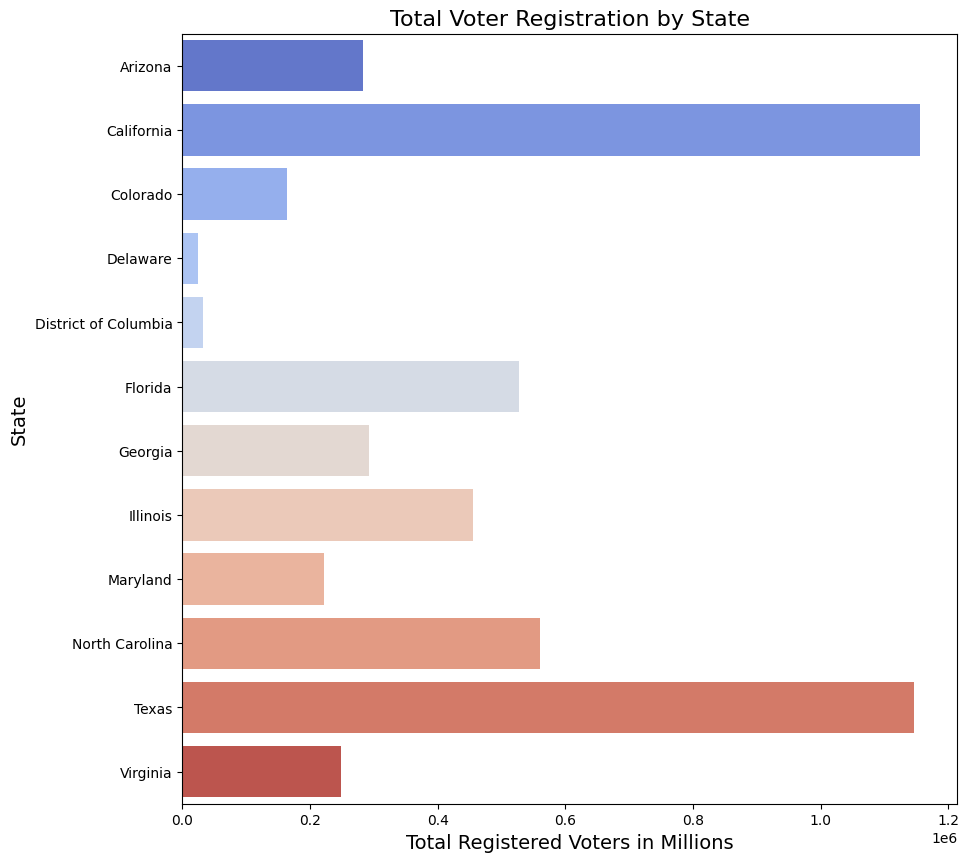

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(total_voters_per_state, x="registered_voters", y="NAME", hue="NAME", palette="coolwarm")
plt.xlabel("Total Registered Voters in Millions", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.title("Total Voter Registration by State", fontsize=16)
plt.show()

It's very pretty, but also important, so let's analyze it. As expected, the two most populated states in this set have the highest number of new registered voters. It also follows that the states with fewer new registered voters are those that are less populated.

Next, let's answer one of our first questions: How did COVID impact voter registration? Let's explore this question by creating a graph that compares voter registration in 2016 vs. 2020.

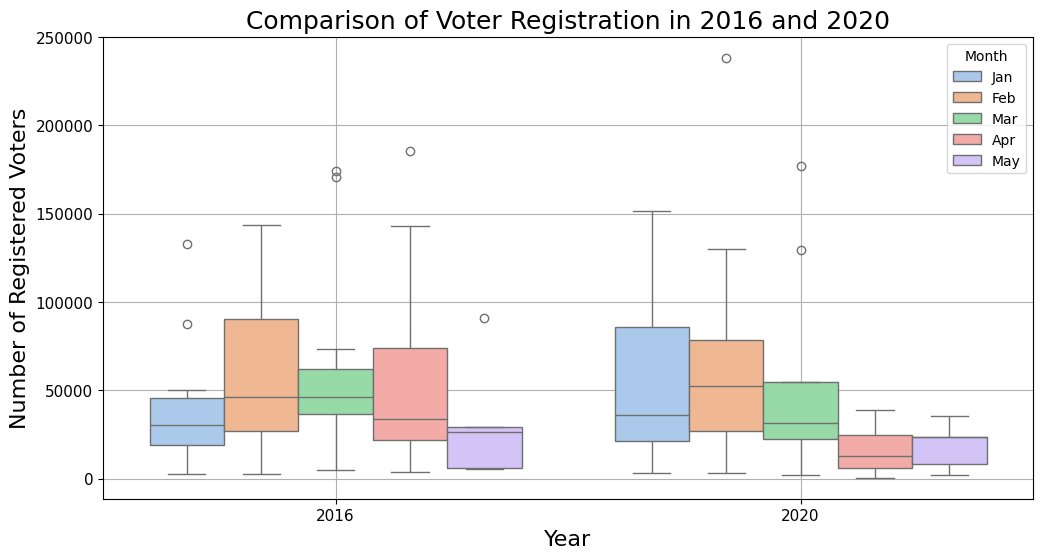

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(voters, x="Year", y="registered_voters", hue="Month", palette="pastel")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Registered Voters", fontsize=16)
plt.title("Comparison of Voter Registration in 2016 and 2020", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.legend(title="Month")
plt.show()

We can see that in 2020, after March, there is a steep drop-off in April and May, showing how COVID impacted voter registration. As for 2016, I'd say that on a month-to-month basis, the numbers are pretty sporadic, except for May, which is much lower, probably due to the lack of data for that month.

Next, for our final visualization, let's answer our second question: How sharp was the decline in new voter registrations in Texas from April 2016 to April 2020? Let's do this by first creating a separate dataframe with just the data for Texas and then compare it between 2016 and 2020.

In [ ]:
texas_voters = voters[(voters["NAME"] == "Texas")]
texas_voters

,NAME,Year,Month,registered_voters
86,Texas,2016,Jan,132860
87,Texas,2016,Feb,143795
88,Texas,2016,Mar,170607
89,Texas,2016,Apr,143199
90,Texas,2016,May,91205
91,Texas,2020,Jan,134559
92,Texas,2020,Feb,130080
93,Texas,2020,Mar,129424
94,Texas,2020,Apr,34694
95,Texas,2020,May,35678


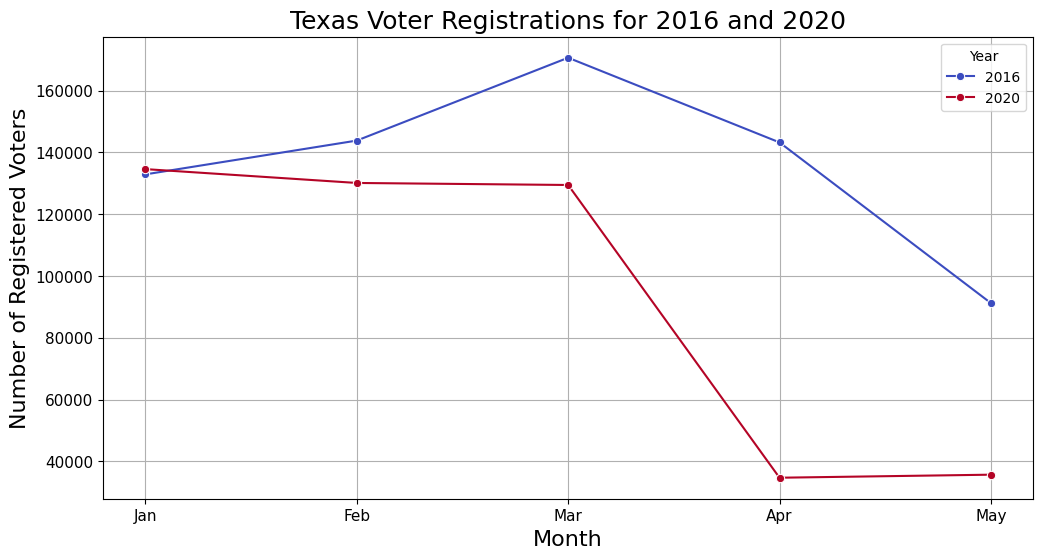

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(texas_voters, x="Month", y="registered_voters", hue="Year", marker="o", palette="coolwarm")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Registered Voters", fontsize=16)
plt.title("Texas Voter Registrations for 2016 and 2020", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.legend(title="Year")
plt.show()

We can see that even though 2020 started out slightly above 2016, as the year progressed, it quickly hit a steep drop-off. Most of this can be attributed to COVID; however, there is definitely something to examine regarding why, even in most of January and all of February, the number of new registered voters was lower than in 2016.

Next, let's do some mapping. The first thing we're going to do is load our dataset about the US.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
states = gpd.read_file(shapefile)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Next, we’re going to show a map of the US, but we will adjust the min and max values so that the map only shows the continental US.

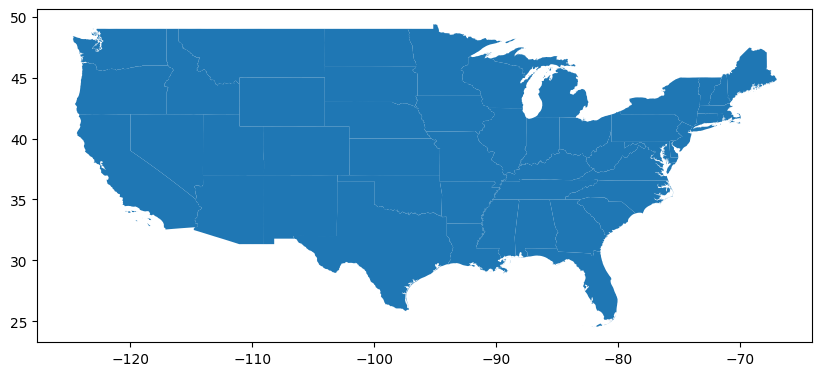

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.show()

Next, we're going to create a dataframe that shows the average voter registration per state so we can visualize it more easily on a map.

In [ ]:
avg_voters_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voters_per_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Next, we’re going to merge this dataset with our states dataset so that we have one large dataset containing both the state information and the voter information. A key point, however, is that we will merge it in such a way that only the rows with information about new registered voters are kept.

In [ ]:
states_and_voters = states.merge(avg_voters_per_state, on="NAME", how="inner")
states_and_voters

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


As we can see there are only 12 rows of data which means that our code worked and it only kept the rows with the 11 states plus D.C.

Next, we are going to do our final visualization and mapping. For this one, we will create a map outlining the boundaries of the continental US. Instead of it being blank, the states that we have data for will be colored in and labeled with their abbreviation and the average number of new registered voters from our last dataframe.

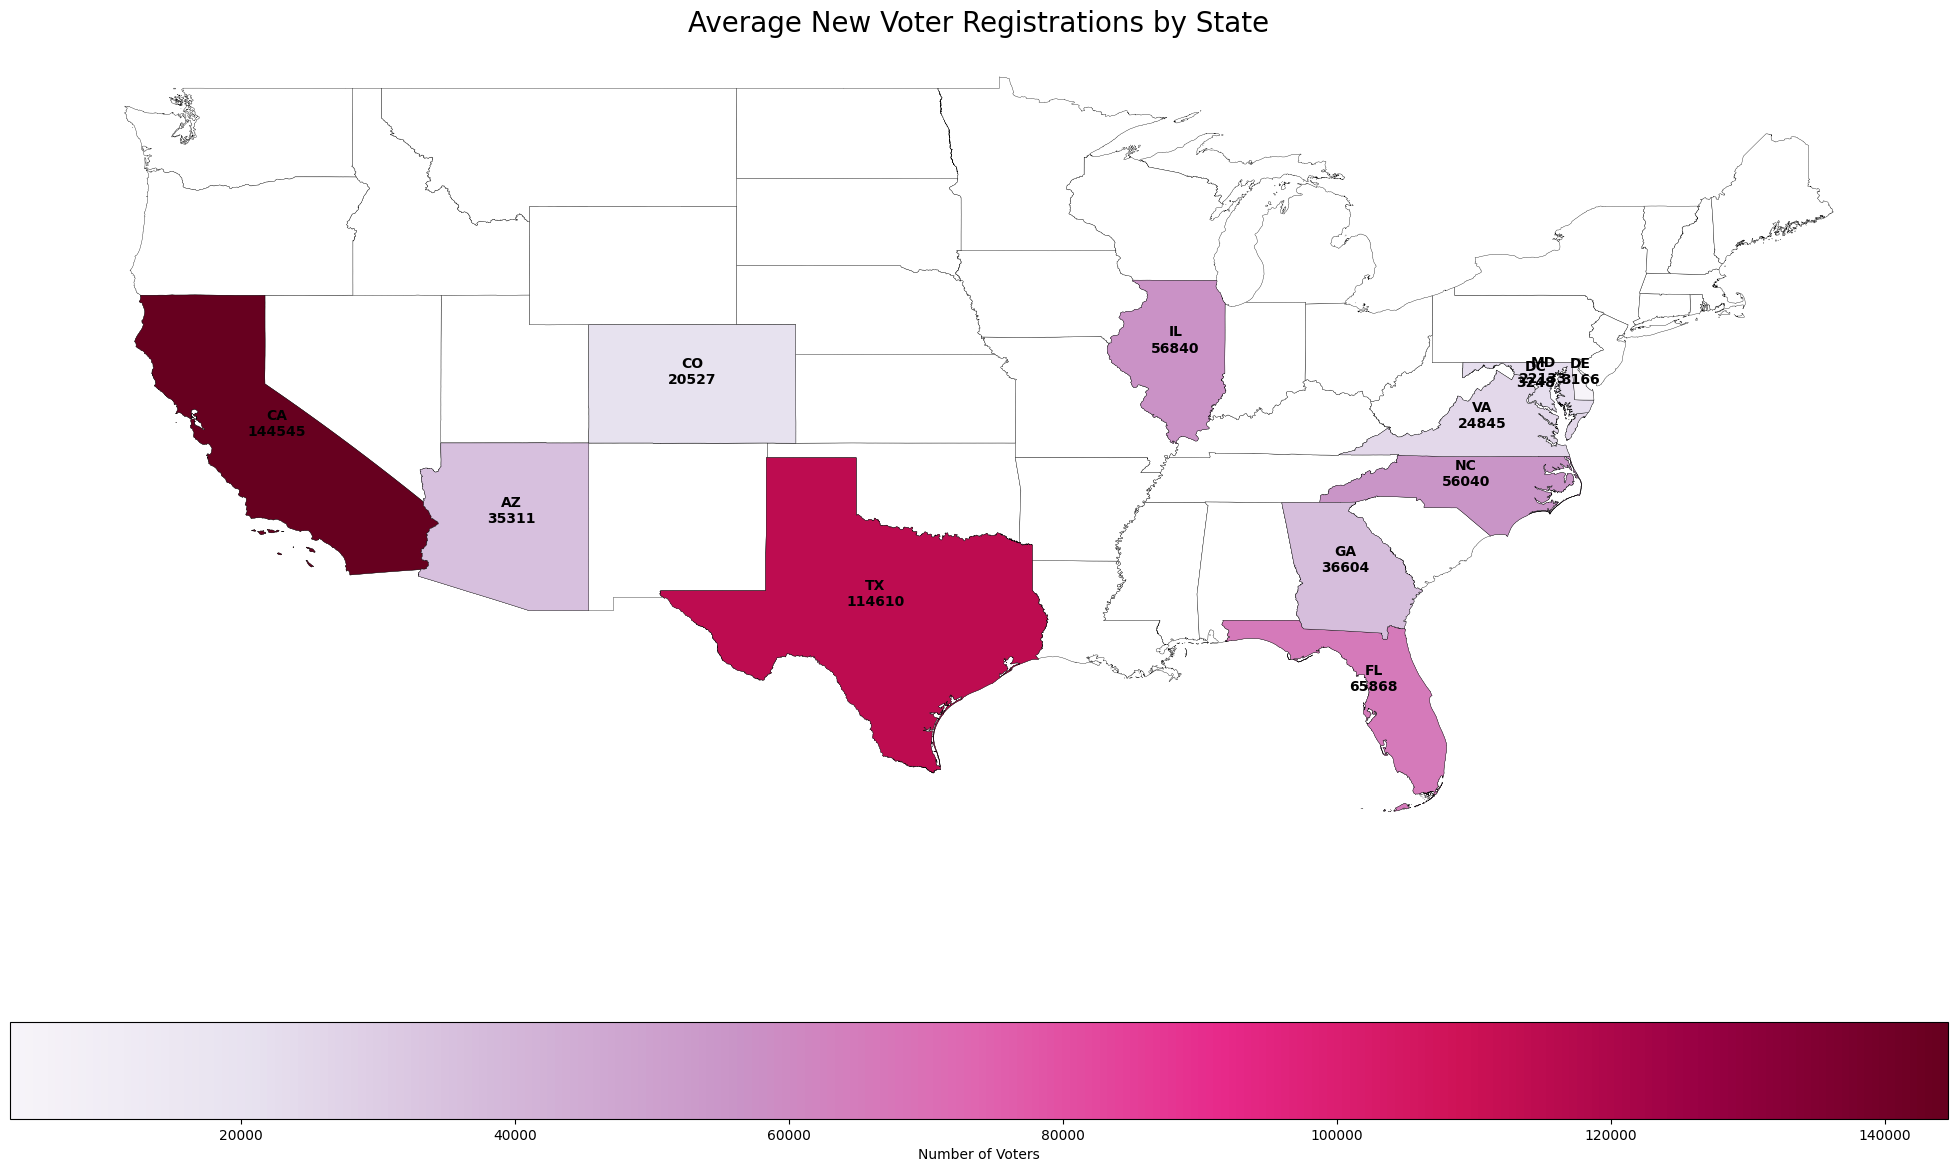

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
bbox.plot(ax=ax, edgecolor="black", linewidth=0.25, color="white")
states_and_voters.plot(column="registered_voters", ax=ax, legend=True,
                       legend_kwds={"label": "Number of Voters", "orientation": "horizontal"},
                       cmap="PuRd", linewidth=.25, edgecolor="black")
ax.set_title("Average New Voter Registrations by State", fontsize=20)
states_and_voters.apply(lambda x: ax.annotate(
    text=f"{x.STUSPS}\n{int(x.registered_voters)}",
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center", fontsize=10, fontweight="bold"), axis=1)
ax.set_axis_off()
plt.show()

# Final Thoughts:

### Let's start with what we found in our exploration. In our analysis and visualizations, we saw that COVID-19 had a sizable impact on voter registrations, especially in Texas, which experienced one of the steepest drop-offs of any state. Between March and April of 2020, there were almost 100,000 fewer new voters, whereas between March and April of 2016, there was only a drop off about 30,000. That’s more than three times the norm in 2020. We also demonstrated that more populated states had higher numbers of new registered voters on a month-by-month basis, as seen in California and Texas comparatively. Finally, we mapped out all our data to visualize it on a state-by-state scale.

### Next, my suggestion for you is to use this data to improve voter registration in these states. For example, based on the data from Texas, we know that during two of the more recent election years, the number of registered voters began to steadily decrease after March. Based on this, I suggest that we need more advertisements or promotional efforts about registering to vote so that the numbers don’t continue to decline. Even though the full picture isn’t available, you can use this data to identify gaps that could help strengthen our democracy.

### Finally, some next steps I would take if I were to continue this project would be to diversify the data—either by finding data for the missing states, gathering more information about the states we have to understand why people are or aren’t registering, or even adding data from 2024 to observe continued trends. On the non-data-mining side, another approach I could take would be a more in-depth analysis of voter registration trends on a state-by-state and month-by-month basis. This could help identify patterns based on geographical areas or historical party affiliations to better understand the factors driving voter registration numbers.

### Github Link

[Midterm Project](https://github.com/sgilsten/325-Midterm)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

I did not use resources other than:
1. The Python notebooks provided by the instructor
2. The links provided in this notebook
3. The assigned readings
4. My own personal notes

This means that I did not:
1. Look up anything on Google, or Stack Overflow, Chatgpt, &c.
2. Discuss the content of the exam with anyone other than the instructors or TAs
3. Do anything that technically doen't break these rules but is against their spirit

Sophie Gilsten